In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import os
import glob
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from scipy import integrate

%matplotlib inline


In [2]:
cd /Users/austinmcdonald/Desktop/data/Fluo4/8-12-16/Ar Fluo4-Ca_Kd

/Users/austinmcdonald/Desktop/data/Fluo4/8-12-16/Ar Fluo4-Ca_Kd


In [3]:
datass = None
datass = []
for files in glob.glob("*.csv"):
    datass.append(files)
datass.pop()
datass

['Ca00.csv',
 'Ca01.csv',
 'Ca02.csv',
 'Ca03.csv',
 'Ca04.csv',
 'Ca05.csv',
 'Ca06.csv',
 'Ca07.csv',
 'Ca08.csv',
 'Ca09.csv',
 'Ca10.csv',
 'Ca11.csv',
 'Ca12.csv',
 'Ca13.csv',
 'Ca14.csv',
 'Ca15.csv',
 'Ca16.csv',
 'Ca17.csv',
 'Ca18.csv',
 'Ca19.csv']

In [4]:
datass[1]

'Ca01.csv'

In [5]:
data = dict()
dataf= dict()
datacut = dict()
intensity = dict()
leng = len(datass)
backg = pd.read_csv('CCD-noise.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
    
for x in range(0,leng):
    data[x] = pd.read_csv(datass[x],delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
    data[x]['dif'] = data[x]['sig'].diff().abs()
    data[x]['BS'] = data[x]['sig']-backg['sig']
    dataf[x] = data[x][data[x]['dif']<.1]
    datacut[x] = dataf[x][(dataf[x]['wave']>490) & (dataf[x]['wave']<700)]
    intensity[x] = integrate.trapz(datacut[x]['BS'], datacut[x]['wave'])



In [6]:
intensity[16]/intensity[0]

61.487737022020276

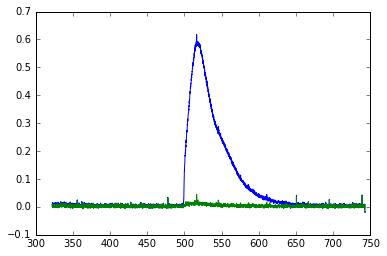

In [7]:
plt.plot(dataf[19]['wave'],dataf[19]['sig'])
plt.plot(dataf[0]['wave'],dataf[0]['sig'])

In [8]:
inte = []
for a in range(0,20):
    inte.append(intensity[a])
inte
Fmax=max(inte)
Fmin=min(inte)
Fs = (inte-Fmin)/(Fmax-inte)
Fs

array([  0.00000000e+00,   2.64172609e-02,   1.87250642e-02,
         5.76282303e-02,   9.34488101e-02,   1.50937201e-01,
         2.27793941e-01,   2.70485460e-01,   3.75022737e-01,
         5.82715954e-01,   9.05479515e-01,   1.01042268e+00,
         1.35563970e+00,   2.08000131e+00,   8.35660409e+00,
         3.83088229e+01,              inf,   6.82662029e+01,
         7.39948042e+01,   3.56336067e+01])

In [9]:
inte

[0.45687681690206094,
 1.1681399462940227,
 0.96484063980539092,
 1.9626817201232676,
 2.8186695280792247,
 4.0810681935201814,
 5.5841108409223859,
 6.3404435420995675,
 7.9941486412706304,
 10.631548095590457,
 13.589177066334804,
 14.346234757541826,
 16.360712216212047,
 19.119778401532599,
 25.138745197441438,
 27.389287422521527,
 28.092321569131631,
 27.693347125628787,
 27.723823443777619,
 27.33794745175916]

In [10]:
xes = list(range(20))
xes

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [11]:
xes = list(range(20))

cacon = []
for f in range(len(xes)):
    cacon.append((505e-6)*(2e-6)/(500e-6+(2e-6*xes[f])))
finalcon=np.cumsum(cacon)/1e-6
finalcon

array([  2.02      ,   4.03195219,   6.03592045,   8.03196788,
        10.02015685,  12.00054901,  13.97320526,  15.9381858 ,
        17.89555015,  19.84535709,  21.78766479,  23.72253069,
        25.6500116 ,  27.57016369,  29.48304248,  31.38870286,
        33.2871991 ,  35.17858487,  37.06291323,  38.94023665])

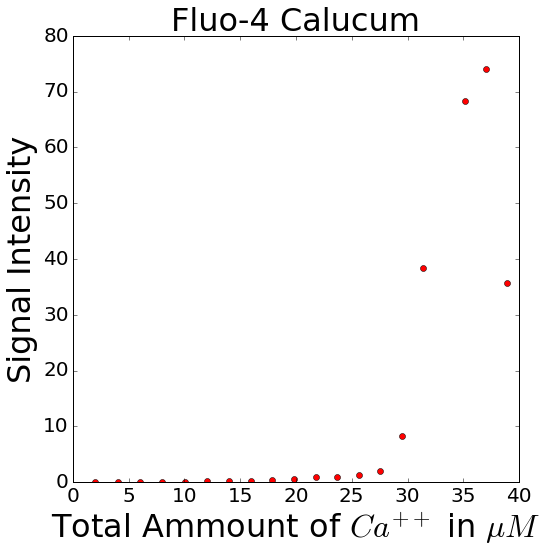

In [12]:
plt.figure(figsize=(8,8))
plt.plot(finalcon,Fs,'ro')
plt.xlabel(r'Total Ammount of $Ca^{++}$ in $\mu M$', fontsize=32)
plt.ylabel('Signal Intensity', fontsize=32)
plt.title('Fluo-4 Calucum', fontsize=32)
plt.tick_params(labelsize=20)
#plt.savefig('/Users/austinmcdonald/Desktop/Plots/Fluo4/Fluo4 Cakd.pdf')

plt.show()

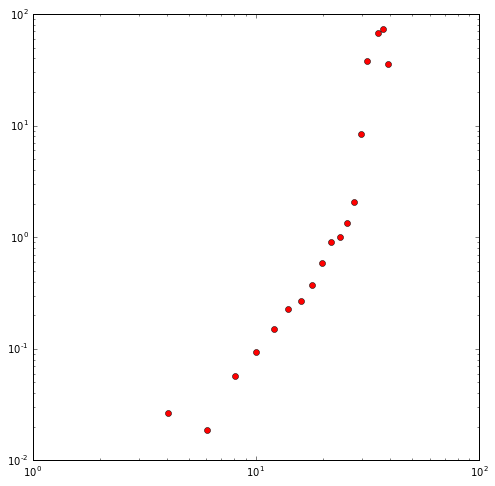

In [13]:
plt.figure(figsize=(8,8))
plt.loglog(finalcon,Fs,'ro')
#plt.ylim(0,5)
plt.show()

In [14]:
Fs[16]

inf

In [15]:
ys =np.log(np.delete(Fs,[0,16]))
xs =np.log(np.delete(finalcon,[0,16]))
fit = np.polyfit(xs,ys,1)
fun = np.poly1d(fit)
kd = np.exp(fun[0])/1e-6
kd

21.574949233829248

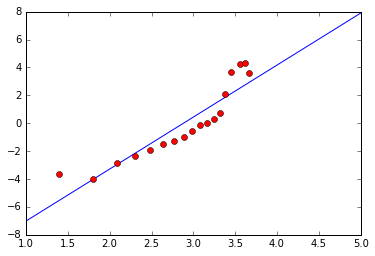

In [16]:
xvals = np.linspace(1.0, 5.0, num=500, endpoint=True)
plt.plot(xvals,(fun[1]*xvals+fun[0]))
plt.plot(np.log(finalcon),np.log(Fs),'ro')

In [48]:
finalcon

array([  2.02      ,   4.03195219,   6.03592045,   8.03196788,
        10.02015685,  12.00054901,  13.97320526,  15.9381858 ,
        17.89555015,  19.84535709,  21.78766479,  23.72253069,
        25.6500116 ,  27.57016369,  29.48304248,  31.38870286,
        33.2871991 ,  35.17858487,  37.06291323,  38.94023665])

In [29]:
len(Fs)

20

In [28]:
Fs

array([  0.00000000e+00,   2.64172609e-02,   1.87250642e-02,
         5.76282303e-02,   9.34488101e-02,   1.50937201e-01,
         2.27793941e-01,   2.70485460e-01,   3.75022737e-01,
         5.82715954e-01,   9.05479515e-01,   1.01042268e+00,
         1.35563970e+00,   2.08000131e+00,   8.35660409e+00,
         3.83088229e+01,              inf,   6.82662029e+01,
         7.39948042e+01,   3.56336067e+01])

In [51]:
Fs2 = np.delete(Fs,16)
Fcon2 = np.delete(finalcon,16)
#print(Fs2)

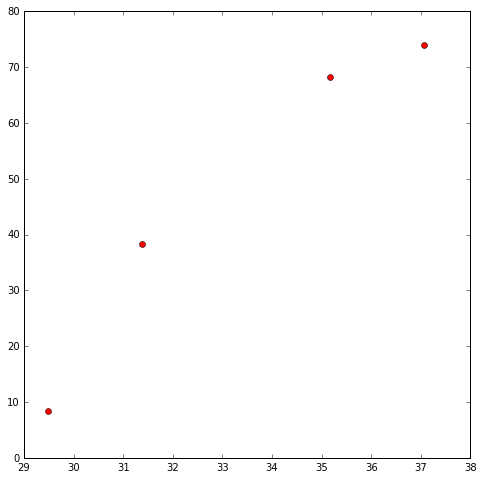

In [60]:
a =14
b =18
plt.figure(figsize=(8,8))
plt.plot(Fcon2[a:b],Fs2[a:b],'ro')
#plt.ylim(0,5)
plt.show()

In [78]:
ys  = np.log(Fs2[14:18])
xs  = np.log(Fcon2[1:5])
fit = np.polyfit(xs,ys,1)
fun = np.poly1d(fit)
kd  = np.exp(fun[0])
kd

0.33592680982846301

(0, 2)

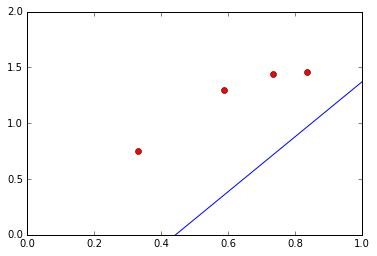

In [80]:
xvals = np.linspace(-1.0, 5.0, num=500, endpoint=True)
plt.plot(xvals,(fun[1]*xvals+fun[0]))
plt.plot(np.log(xs),np.log(ys),'ro')
plt.xlim(0,1)
plt.ylim(0,2)

In [73]:
xs

array([ 1.39425067,  1.79772836])

In [74]:
ys

array([ 2.12305213,  3.64568023])